In [1]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle

In [2]:
data = pd.read_csv('ml_data_variable.csv')

# extract the independent variables (X) and dependent variable (y)
X = data[['COAL, Thousand Short Tons', 'NATURALGAS, Billion Cubic Feet', 'ELECTRICITY, Million Kilowatthours',
          'PETRO_INDUSTRIAL, Thousand Barrels per Day', 'PETRO_RESIDENTIAL, Thousand Barrels per Day',
          'PETRO_COMMERCIAL, Thousand Barrels per Day', 'PETRO_TRANSPORTATION, Thousand Barrels per Day',
          'PETRO_ELECTRICPOWER, Thousand Barrels per Day']]

y = data['CO2, Million Metric Tons']


# Shuffle data
X, y = shuffle(X, y, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


k = 2
model = KNeighborsRegressor(n_neighbors=k)
model.fit(X_train, y_train)

# Print the number of neighbors
n_neighbors = model.n_neighbors
print("Number of Neighbors:", n_neighbors)

# Print the weights used for prediction
weights = model.weights
print("Weights:", weights)

# Print the metric used for distance calculation
metric = model.metric
print("Distance Metric:", metric)

Number of Neighbors: 2
Weights: uniform
Distance Metric: minkowski


R² (Training): 0.8978191290387001
###########################################################################
R²: 0.70
Mean Absolute Error: 22.14
Mean Squared Error: 799.55
Root Mean Squared Error: 28.28


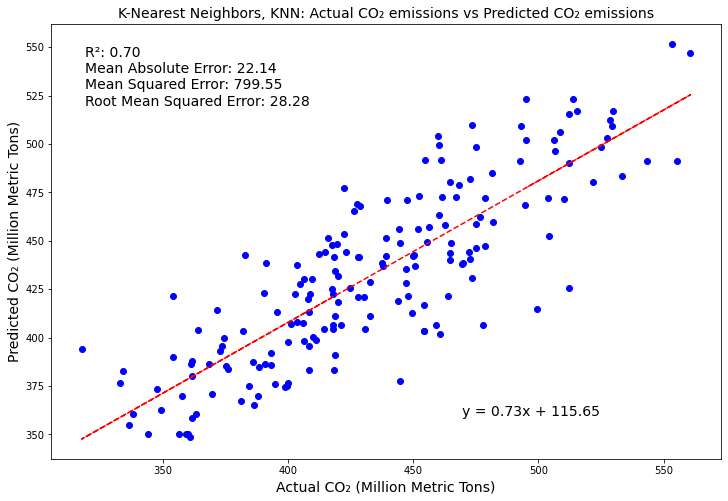

"\nScaling of Features: KNN is sensitive to the scale of the features. If the features have different scales, it can impact the distance calculations and the performance of the model. Ensure that the features are appropriately scaled by using techniques such as standardization or normalization.\n\nInappropriate Choice of k: The choice of the number of neighbors (k) can significantly affect the performance of KNN. If k is too small, the model may overfit and not generalize well to unseen data, leading to a low R2. On the other hand, if k is too large, the model may underfit and fail to capture the local patterns in the data. Experiment with different values of k to find the optimal balance.\n\nOutliers or Noisy Data: Outliers or noisy data points can adversely affect the performance of KNN. They can significantly influence the neighbors' selection and introduce bias in the predictions. Consider identifying and handling outliers or applying noise reduction techniques to improve the model

In [3]:
k = 2
knn_regressor = KNeighborsRegressor(n_neighbors=k)
knn_regressor.fit(X_train, y_train)

# Make predictions on the training data
y_pred_train = knn_regressor.predict(X_train)

# Calculate the R-squared score for the training data
r2_train = r2_score(y_train, y_pred_train)
print("R² (Training):", r2_train)

print('###########################################################################')

# Predict the target variable for the test data
y_pred = knn_regressor.predict(X_test)


# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print results
print("R²:", format(r2, ".2f"))
print("Mean Absolute Error:", format(mae, ".2f"))
print("Mean Squared Error:", format(mse, ".2f"))
print("Root Mean Squared Error:", format(rmse, ".2f"))


# Calculate statistical parameters
correlation = np.corrcoef(y_test, y_pred)[0, 1]
r_squared = np.square(correlation)

# Perform linear regression to get the line equation
slope, intercept = np.polyfit(y_test, y_pred, 1)

# Add the equation as text on the plot
equation = f'y = {slope:.2f}x + {intercept:.2f}'

# Fit a linear regression line
trendline = np.polyfit(y_test, y_pred, 1)
trendline_fn = np.poly1d(trendline)

plt.figure(figsize=(12, 8))  # Specify the width and height in inches

# Plot Actual vs Predicted values with trend line
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test, trendline_fn(y_test), color='red', linestyle='--')
plt.xlabel('Actual CO₂ (Million Metric Tons)', fontsize=14)
plt.ylabel('Predicted CO₂ (Million Metric Tons)', fontsize=14)
plt.title('K-Nearest Neighbors, KNN: Actual CO₂ emissions vs Predicted CO₂ emissions', fontsize=14)

# Annotate statistical parameters on the plot
#textstr = f'Correlation coefficient: {correlation:.2f}\nR-squared: {r_squared:.2f}'
textstr = f'R²: {format(r2, ".2f")}\nMean Absolute Error: {format(mae, ".2f")}\nMean Squared Error: {format(mse, ".2f")}\nRoot Mean Squared Error: {format(rmse, ".2f")}'
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, verticalalignment='top', fontsize=14)
plt.text(0.6, 0.2, equation, transform=plt.gcf().transFigure, fontsize=14)
plt.savefig('K-Nearest Neighbors Actual CO₂ emissions vs Predicted CO₂ emissions.jpg')
plt.show()

'''
Scaling of Features: KNN is sensitive to the scale of the features. If the features have different scales, it can impact the distance calculations and the performance of the model. Ensure that the features are appropriately scaled by using techniques such as standardization or normalization.

Inappropriate Choice of k: The choice of the number of neighbors (k) can significantly affect the performance of KNN. If k is too small, the model may overfit and not generalize well to unseen data, leading to a low R2. On the other hand, if k is too large, the model may underfit and fail to capture the local patterns in the data. Experiment with different values of k to find the optimal balance.

Outliers or Noisy Data: Outliers or noisy data points can adversely affect the performance of KNN. They can significantly influence the neighbors' selection and introduce bias in the predictions. Consider identifying and handling outliers or applying noise reduction techniques to improve the model's performance.

Insufficient Data: KNN models generally perform better with a larger amount of data. If you have a small dataset, the model may struggle to capture the underlying patterns accurately. Gathering more data or using techniques like cross-validation can help address this issue.

Irrelevant Features: Including irrelevant features in the model can introduce noise and negatively impact the performance. Consider carefully selecting the most relevant features and removing any irrelevant ones.

Multicollinearity: If the features exhibit high multicollinearity (correlation between features), it can lead to instability and unreliable estimates in KNN. Check for multicollinearity and consider addressing it through techniques such as feature selection or dimensionality reduction.

'''

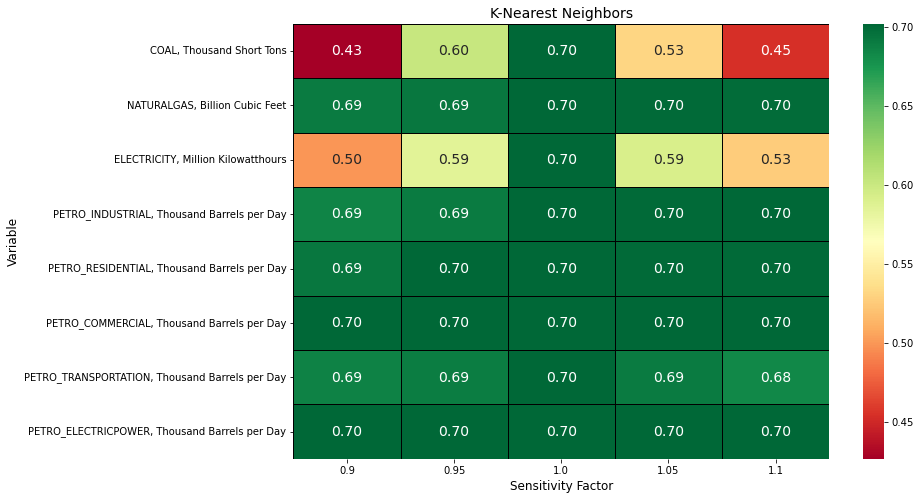

In [4]:

# Define the variables to analyze for sensitivity
variables_to_analyze = ['COAL, Thousand Short Tons', 'NATURALGAS, Billion Cubic Feet', 'ELECTRICITY, Million Kilowatthours',
                        'PETRO_INDUSTRIAL, Thousand Barrels per Day', 'PETRO_RESIDENTIAL, Thousand Barrels per Day',
                        'PETRO_COMMERCIAL, Thousand Barrels per Day', 'PETRO_TRANSPORTATION, Thousand Barrels per Day',
                        'PETRO_ELECTRICPOWER, Thousand Barrels per Day']

# Initialize a dictionary to store sensitivity analysis results
sensitivity_results = {}

# Iterate over the variables for sensitivity analysis
for variable_name in variables_to_analyze:
    # Get the original values of the selected variable
    original_values = X_test[variable_name].copy()

    # Initialize a list to store sensitivity analysis results for the current variable
    variable_sensitivity_results = []

    # Iterate over different sensitivities (e.g., increase by 10%)
    for sensitivity in [0.9, 0.95, 1.0, 1.05, 1.1]:
        # Modify the values of the selected variable
        modified_values = original_values * sensitivity
        X_test_modified = X_test.copy()
        X_test_modified[variable_name] = modified_values

        # Make predictions using the modified dataset
        y_pred_modified = knn_regressor.predict(X_test_modified)

        # Calculate the R-squared score for the modified predictions
        r2_modified = r2_score(y_test, y_pred_modified)

        # Store the sensitivity analysis results
        variable_sensitivity_results.append(r2_modified)

    # Store the sensitivity analysis results for the current variable in the dictionary
    sensitivity_results[variable_name] = variable_sensitivity_results

# Create a matrix of sensitivity analysis results
sensitivity_matrix = np.array([sensitivity_results[variable] for variable in variables_to_analyze])

# Create a heatmap to visualize the sensitivity analysis results
plt.figure(figsize=(12, 8))  # Adjust the figure size if needed

sns.heatmap(sensitivity_matrix, cmap='RdYlGn', annot=True, fmt='.2f', annot_kws={'fontsize': 14},
            xticklabels=[0.9, 0.95, 1.0, 1.05, 1.1], yticklabels=variables_to_analyze,
            linewidths=0.5, linecolor='black')

plt.xlabel('Sensitivity Factor', fontsize=12)
plt.ylabel('Variable', fontsize=12)
plt.title('K-Nearest Neighbors', fontsize=14)
'Decision Tree Sensitivity Analysis of different machine learning methods: Changes in the R² when the selected variable is perturbed'
plt.savefig('K-Nearest Neighbors Sensitivity Analysis.jpg', dpi=300, bbox_inches='tight')
plt.show()
